In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Reading data and Dropping CustomerID and name columns as we don't need them in EDA and Model training.

In [2]:
df = pd.read_excel(r'D:/Data Science/Job Assignments/SunBaseData/Data/customer_churn_large_dataset.xlsx')
df.drop(['CustomerID', 'Name'], axis=1, inplace=True)
df.tail()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1
99999,27,Female,Los Angeles,19,76.57,173,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

#### Observation
There are `no missing values!!` So we don't need any missing value handling :).<br>
If there were any missing values then we could have used imputation techniques like random sample imputation, target guided mean imputation, etc.<br>
Such that the original distribution is not distorted.

### Feature Engineering processes

Separating categorical columns and numerical columns.<br>
We will do Feature engineering separately for both of them and then analyse all of them together like their coorrelation matrix, feature selection, etc.

In [5]:
categorical_columns = df.columns[df.dtypes == 'object']
# categorical_columns = categorical_columns.insert(len(categorical_columns), ['Churn'])
numerical_columns = df.columns[df.dtypes != 'object']
print(categorical_columns)
print(numerical_columns)

Index(['Gender', 'Location'], dtype='object')
Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')


In [6]:
df[categorical_columns].describe()

,Gender,Location
count,100000,100000
unique,2,5
top,Female,Houston
freq,50216,20157


In [7]:
df[numerical_columns].describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


For `categorical_columns`, first we do encoding.

In [8]:
df[categorical_columns].head()

,Gender,Location
0,Male,Los Angeles
1,Female,New York
2,Female,Los Angeles
3,Female,Miami
4,Female,Miami


In [9]:
df['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

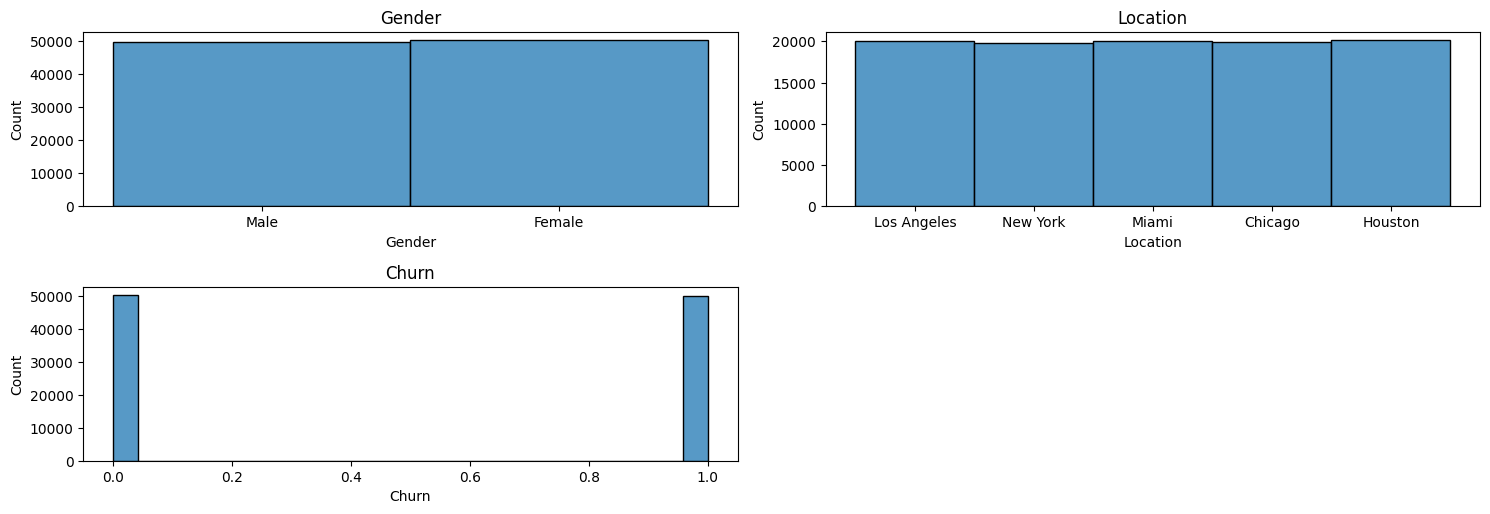

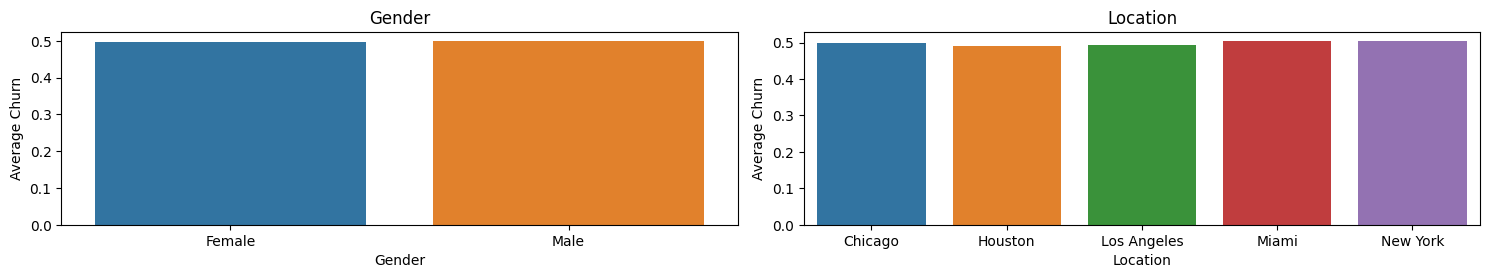

In [10]:
plt.figure(figsize=(15,15))
for i, col in enumerate(categorical_columns.insert(len(categorical_columns), ['Churn'])):
    plt.subplot(6,2,i+1)
    sns.histplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


plt.figure(figsize=(15,15))

for i,col in enumerate(categorical_columns):
    result = df.groupby(col)['Churn'].mean()
    plt.subplot(6,2,i+1)
    plt.title(col)
    plt.ylabel("Average Churn")
    sns.barplot(x=result.index, y=result.values)

plt.tight_layout()
plt.show()

#### Observation
According to the plots, we can say that nearly 50% of the data has male customers and 50% has female customers.<br>
And the Location feature also has nearly equal number of data points for all locations.<br>
Also we can see the frequency of Churn, and say that the `dataset is balanced!!`

### Categorical Encoding
We consider that there is no ordinal relationship between the categories in both Gender and Location Features.<br>
So, we will just do a nominal encoding called `OneHotEncoding`.

In [11]:
# Perform one-hot encoding
encoded_df = pd.get_dummies(df, columns=['Gender', 'Location'])

encoded_df = pd.DataFrame(encoded_df)
encoded_df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,False,True,False,False,True,False,False
1,62,1,48.76,172,0,True,False,False,False,False,False,True
2,24,5,85.47,460,0,True,False,False,False,True,False,False
3,36,3,97.94,297,1,True,False,False,False,False,True,False
4,46,19,58.14,266,0,True,False,False,False,False,True,False


For `numerical_columns`, first we check Outliers.

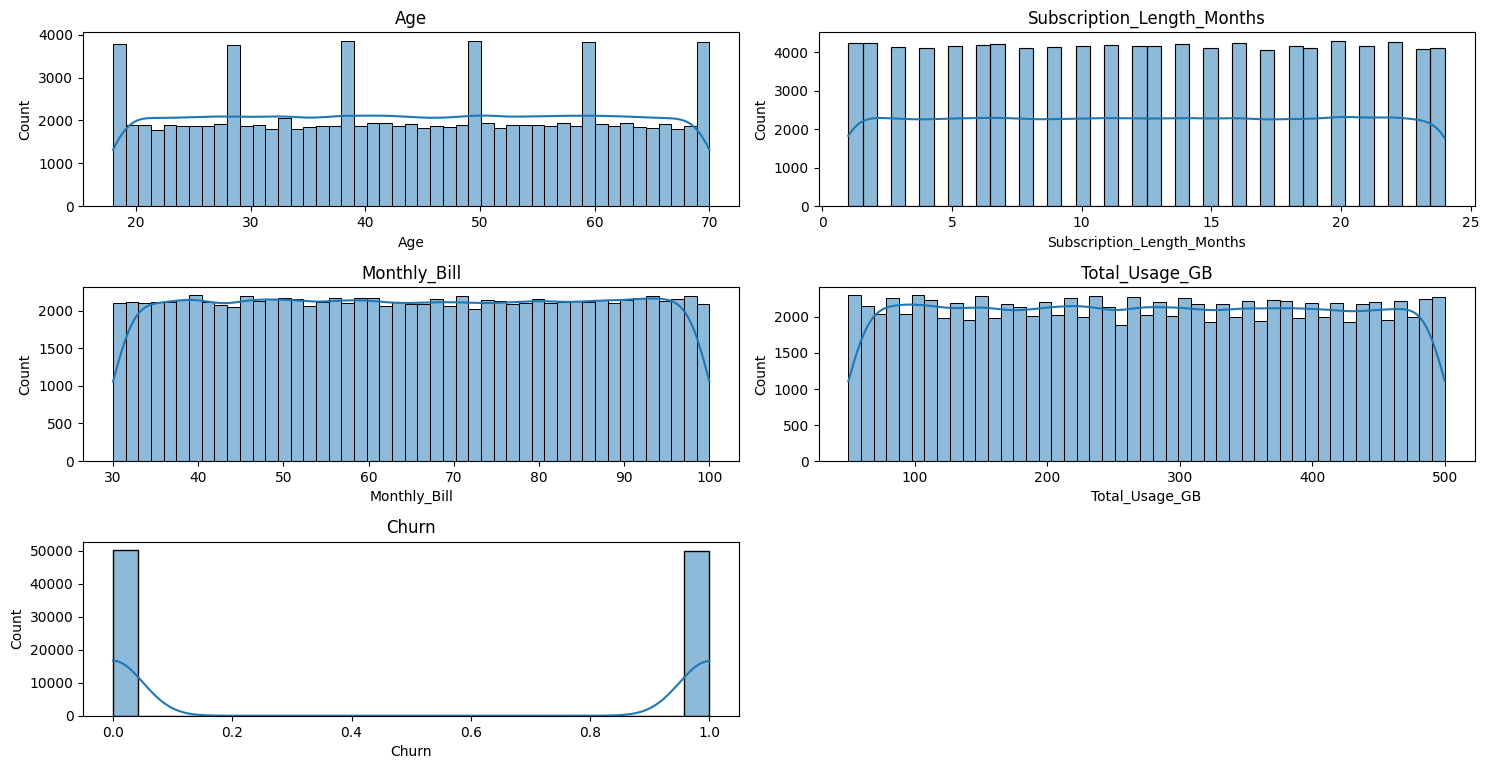

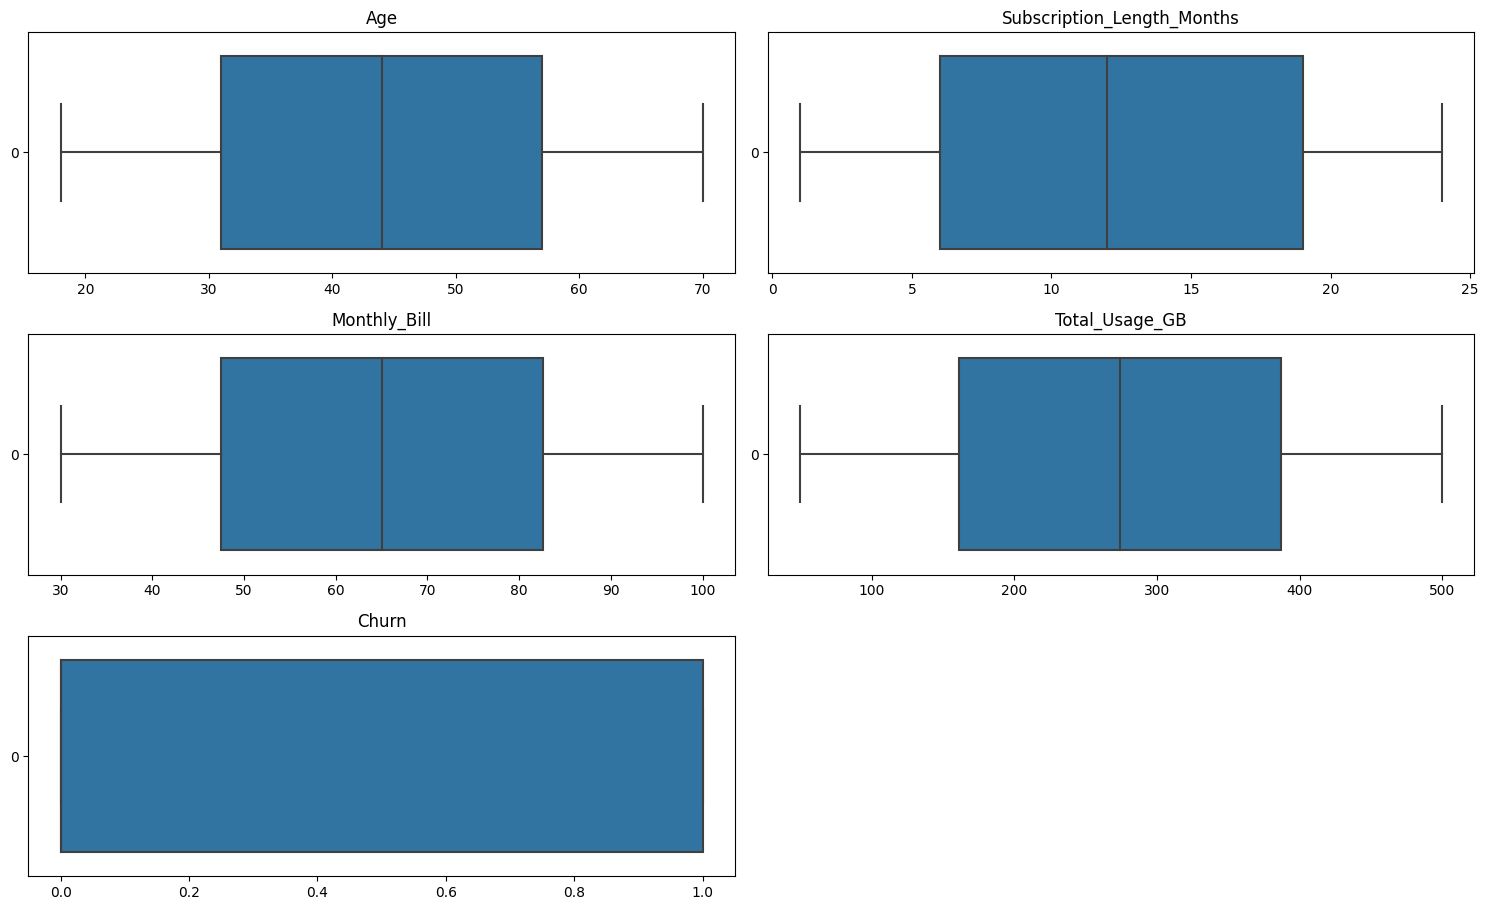

In [12]:
plt.figure(figsize=(15,15))

for i, col in enumerate(numerical_columns):
    plt.subplot(6,2,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


plt.figure(figsize=(15,15))

for i, col in enumerate(numerical_columns):
    plt.subplot(5,2,i+1)
    sns.boxplot(df[col], orient='h')
    plt.title(col)

plt.tight_layout()
plt.show()

As seen in the box plots, we can say all of the numerical features `does not have outliers`.

### Feature Selection

<Axes: >

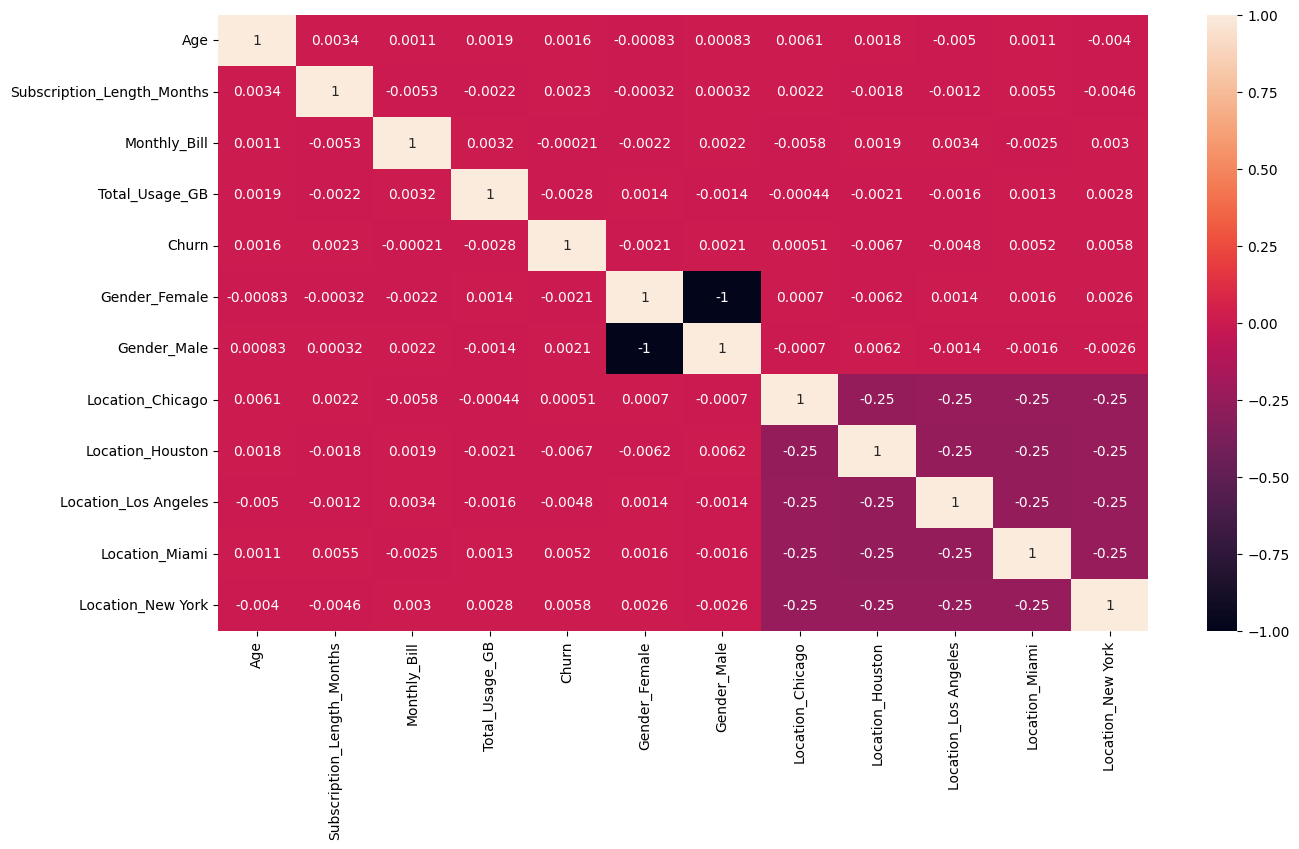

In [13]:
## correlation using pearson correlation
plt.figure(figsize=(15,8))
sns.heatmap(encoded_df.corr(),annot=True)

<Axes: >

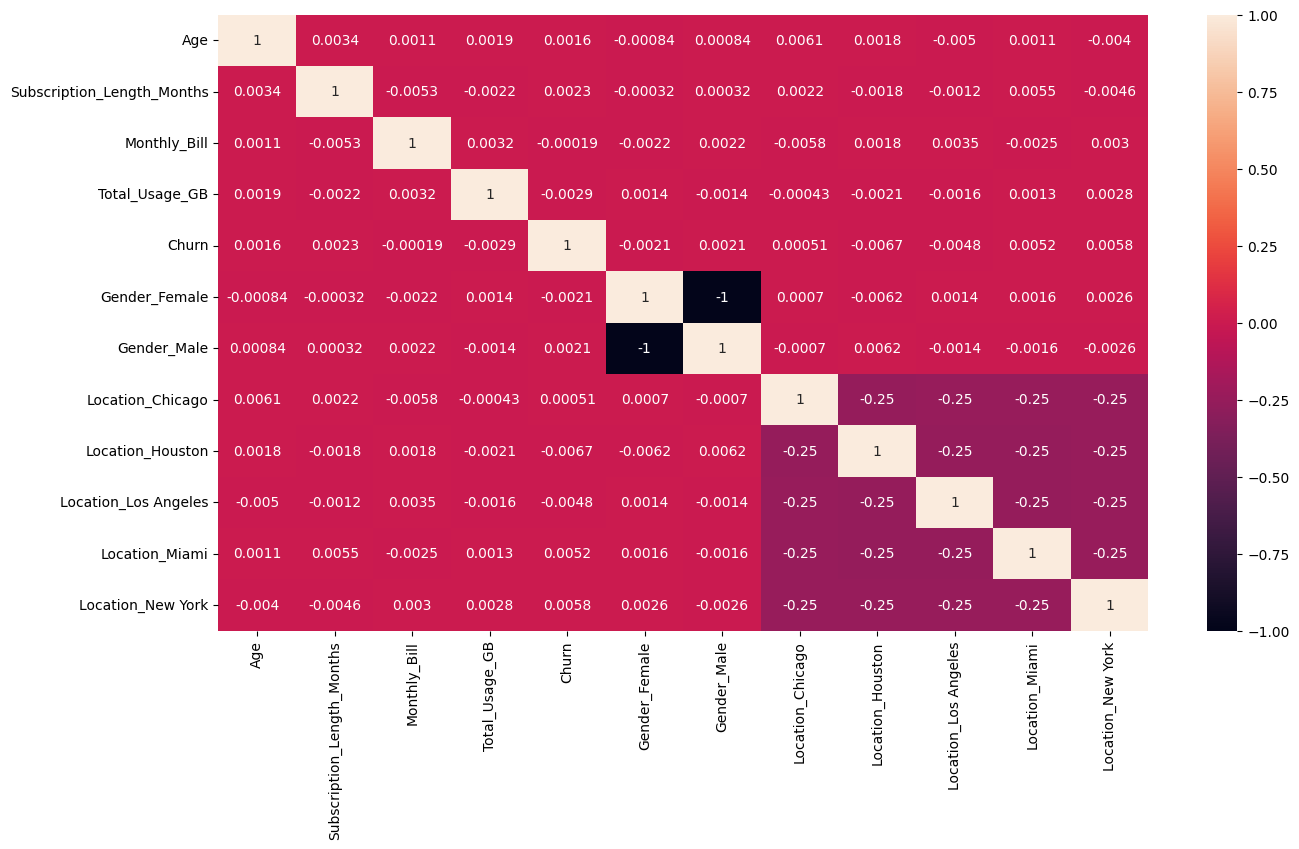

In [14]:
## correlation using spearman rank correlation
plt.figure(figsize=(15,8))
sns.heatmap(encoded_df.corr(method='spearman'),annot=True)

In [15]:
from sklearn.feature_selection import mutual_info_regression

X = encoded_df[encoded_df.columns].drop(['Churn'], axis=True)
y = encoded_df['Churn']

mutual_info_scores = mutual_info_regression(X, y)

# Create a DataFrame to store feature names and their corresponding mutual information scores
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mutual_info_scores})

# Sort the DataFrame by mutual information scores in descending order
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)

print(mi_df)


                       Feature  Mutual_Information
1   Subscription_Length_Months            0.004003
7             Location_Houston            0.001996
8         Location_Los Angeles            0.001629
6             Location_Chicago            0.000334
0                          Age            0.000000
2                 Monthly_Bill            0.000000
3               Total_Usage_GB            0.000000
4                Gender_Female            0.000000
5                  Gender_Male            0.000000
9               Location_Miami            0.000000
10           Location_New York            0.000000


This values shows that the independent features are `not correlated` to our target feature.<br>
Due to this the overall `accuracy` of our model will be `very less`.

### Data Visualization

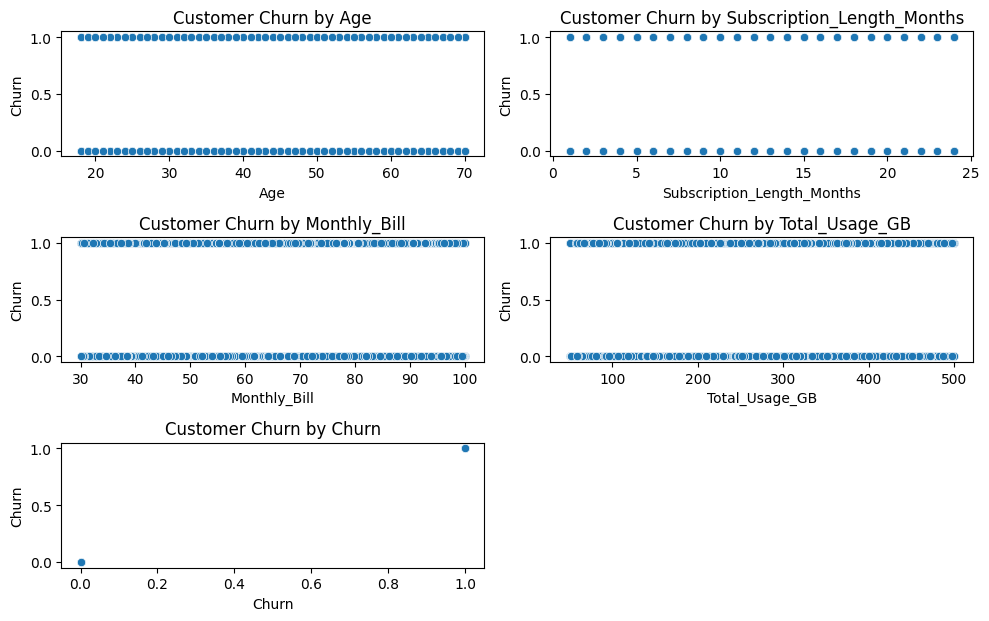

In [16]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(5, 2, i+1)
    sns.scatterplot(df, x=col, y='Churn')
    plt.title(f'Customer Churn by {col}')

plt.tight_layout()
plt.show()

This scatter plots also shows us that the independent features do not relate to target feature.<br>
Hence, the model can't be trained well!!